# Visualization of EventBrite data: bar charts

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/eventbrite.csv")

In [3]:
df.head()

,event,event_date,year,org_id,name,email,affiliation,car1,car2,eSc_collab,...,event_type,event_level,event_focus,ticket_type,order_id,id,event_id,venue_id,uri,affiliation_type
0,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Marco de Vos,devos@astron.nl,ASTRON,NaN,NaN,False,...,eScience Symposium,Other,Other,Regular,520207803,655709628,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,Research Institute
1,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Gert Kruithof,kruithof@astron.nl,ASTRON,NaN,NaN,False,...,eScience Symposium,Other,Other,Early Bird,520781005,656441065,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,Research Institute
2,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Emma Beauxis-Aussalet,emalb@cwi.nl,CENTRUM WISKUNDE & INFORMATICA,NaN,NaN,False,...,eScience Symposium,Other,Other,Student,519898955,655325883,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,Research Institute
3,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Vyacheslav Tykhonov,vyacheslav.tykhonov@dans.knaw.nl,DANS-KNAW,NaN,NaN,False,...,eScience Symposium,Other,Other,Early Bird,520212788,655715811,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,Research Institute
4,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Mateusz Kuzak,m.kuzak@esciencecenter.nl,ESCIENCE CENTER,NaN,NaN,False,...,eScience Symposium,Other,Other,Regular,519906213,655334607,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,eScience Center


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event             1086 non-null   object 
 1   event_date        1086 non-null   object 
 2   year              1086 non-null   int64  
 3   org_id            1086 non-null   object 
 4   name              1086 non-null   object 
 5   email             1086 non-null   object 
 6   affiliation       809 non-null    object 
 7   car1              472 non-null    object 
 8   car2              58 non-null     object 
 9   eSc_collab        1086 non-null   bool   
 10  ERCdis            639 non-null    object 
 11  NLeScdis          639 non-null    object 
 12  dis1              651 non-null    object 
 13  dis2              288 non-null    object 
 14  dis3              135 non-null    object 
 15  dis4              61 non-null     object 
 16  dis5              25 non-null     object 


## Bar charts

#### Bar chart function

In [5]:
# Define function for bar plot

def barplot(df, x_column, y_column):
    sns.set()
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(8,6))
    sns.barplot(x=x_column, y=y_column, data=df, color='deepskyblue')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel(x_column, fontsize=16)
    plt.ylabel(y_column, fontsize=16)
    plt.suptitle(y_column + ' by ' + x_column, fontsize=18)
    sns.despine()
    
    return plt.show()


#### Horizontal bar chart function

In [6]:
# Define function for horizontal bar plot

def barplot_horiz(df, x_column, y_column):
    sns.set()
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(8,6))
    sns.barplot(x=x_column, y=y_column, data=df, color='deepskyblue')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel(x_column, fontsize=16)
    plt.ylabel("", fontsize=16)
    plt.suptitle(x_column + ' by ' + y_column, fontsize=18)
    sns.despine()
    
    return plt.show()


#### Participants by year

In [7]:
# filter out escience employees
df_external = df[df['affiliation'] != 'ESCIENCE CENTER']
df_external['affiliation'].value_counts()

TU DELFT                                             82
UVA                                                  64
UTRECHT UNIVERSITY                                   59
VU AMSTERDAM                                         49
WAGENINGEN UNIVERSITY                                35
                                                     ..
INSTITUTE FOR WAR, HOLOCAUST AND GENOCIDE STUDIES     1
INTERNATIONAL INSTITUTE FOR SOCIAL HISTORY (IISG)     1
UNIVERSITY OF PARMA                                   1
LEUVEN UNIVERSITY                                     1
UNIVERSITY OF VIENNA                                  1
Name: affiliation, Length: 85, dtype: int64

In [8]:
# Create df with participants by year

df_participants_by_year = df_external.groupby('year').agg({'order_id': 'count'}).reset_index()
df_participants_by_year.rename(columns = {'order_id': 'participants'}, inplace = True)
df_participants_by_year.head()

,year,participants
0,2016,29
1,2017,160
2,2018,67
3,2019,50
4,2020,239


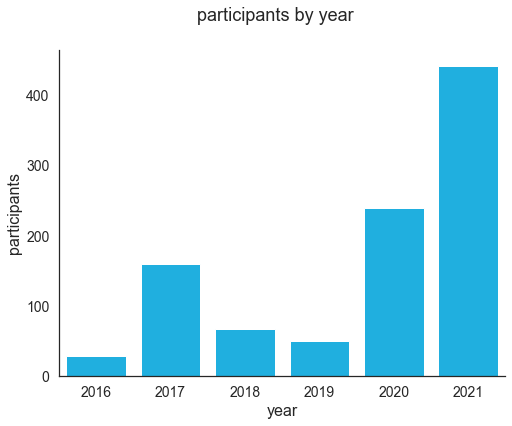

In [9]:
# plot participants by year
barplot(df_participants_by_year, 'year', 'participants')

#### Digital skills: participants by year 

In [10]:
# select digital skills events only

# only escience events
df_escience = df_external[(df_external['org_id'] == 'NLeSc') | (df_external['org_id'] == 'ePlan')]

# filter out the escience symposia
df_digitalskills = df_escience[df_escience['event'].str.contains('Symposium') == False]

df_digitalskills['org_id'].value_counts()

NLeSc    721
ePlan     35
Name: org_id, dtype: int64

In [11]:
# Create df with digital skills participants by year

df_digitalskills_participants_by_year = df_digitalskills.groupby('year').agg({'org_id': 'count'}).reset_index()
df_digitalskills_participants_by_year.rename(columns = {'org_id': 'participants'}, inplace = True)
df_digitalskills_participants_by_year.head()


,year,participants
0,2017,104
1,2018,67
2,2019,44
3,2020,182
4,2021,359


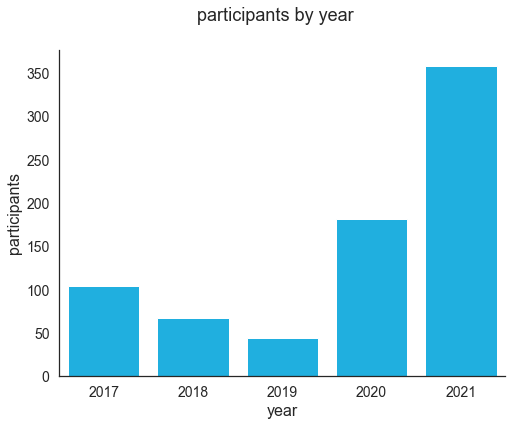

In [12]:
# plot participants by year for digital skills events

barplot(df_digitalskills_participants_by_year, 'year', 'participants')

#### NL-RSE: participants by year 

In [13]:
# only NL-RSE events
df_nlrse = df_external[df_external['org_id'] == 'NL-RSE']
df_nlrse['org_id'].value_counts()

NL-RSE    140
Name: org_id, dtype: int64

In [14]:
# Create df with NL-RSE participants by year
df_nlrse_participants_by_year = df_nlrse.groupby('year').agg({'order_id': 'count'}).reset_index()
df_nlrse_participants_by_year.rename(columns = {'order_id': 'participants'}, inplace = True)
df_nlrse_participants_by_year.head()

,year,participants
0,2020,57
1,2021,83


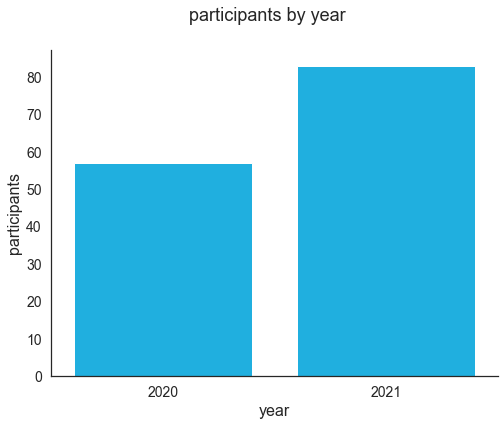

In [15]:
# plot participants by year for NL-RSE events

barplot(df_nlrse_participants_by_year, 'year', 'participants')

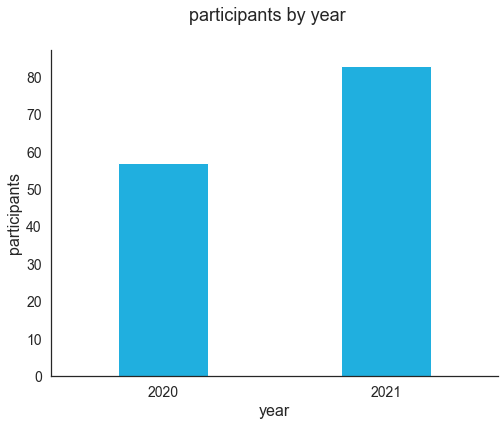

In [16]:
# adjust column width

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='year', y='participants', data=df_nlrse_participants_by_year, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('year', fontsize=16)
plt.ylabel('participants', fontsize=16)
plt.suptitle('participants by year', fontsize=18)
sns.despine()

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # change the bar width
        patch.set_width(new_value)

        # recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .40)
plt.show()

#### Participants by affiliation type

In [17]:
# Create df with participants by affiliation type

df_participants_by_affl = pd.DataFrame(df['affiliation_type'].value_counts())
df_participants_by_affl.reset_index (inplace = True)
df_participants_by_affl.rename(columns = {'index': 'affiliation type', 'affiliation_type': 'participants'}, inplace = True)
df_participants_by_affl.head()

,affiliation type,participants
0,University,477
1,eScience Center,99
2,Research Institute,92
3,University Medical Center,62
4,Consortium,15


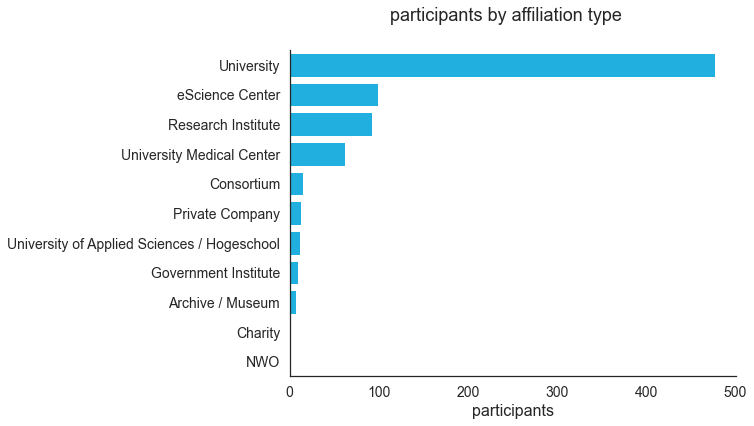

In [18]:
# Create horizontal bar chart 

barplot_horiz(df_participants_by_affl, 'participants', 'affiliation type')

In [19]:
# Excluding participants from eScience Center
# Create df with participants by affiliation type

df_participants_by_affl = pd.DataFrame(df_external['affiliation_type'].value_counts())
df_participants_by_affl.reset_index (inplace = True)
df_participants_by_affl.rename(columns = {'index': 'affiliation type', 'affiliation_type': 'participants'}, inplace = True)
df_participants_by_affl.head()

,affiliation type,participants
0,University,477
1,Research Institute,92
2,University Medical Center,62
3,Consortium,15
4,Private Company,13


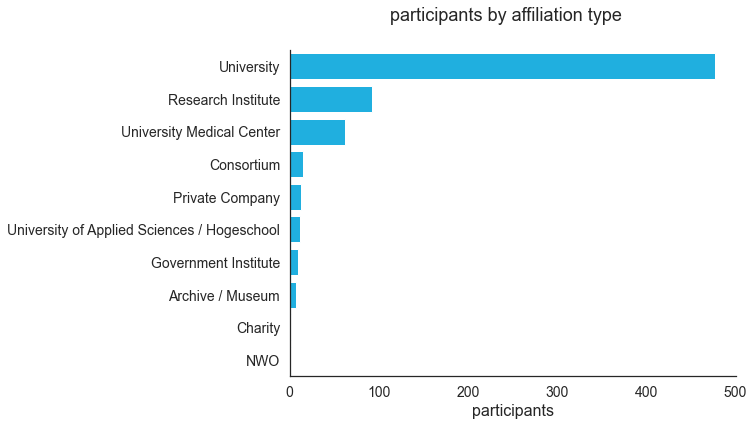

In [20]:
# Create horizontal bar chart 

barplot_horiz(df_participants_by_affl, 'participants', 'affiliation type')

#### Participants by disciplinary section

In [21]:
# Create df with participants by disciplinary section
# quite a lot of missing data but that's because of the eventbrite forms of some of the events

df_participants_by_section = pd.DataFrame(df['NLeScdis'].value_counts())
df_participants_by_section.reset_index (inplace = True)
df_participants_by_section.rename(columns = {'index': 'disciplinary section', 'NLeScdis': 'participants'}, inplace = True)
df_participants_by_section.head()

,disciplinary section,participants
0,Ph&B,284
1,LS,197
2,SSH,100
3,SE,58


In [22]:
df_participants_by_section['disciplinary section'].replace("Ph&B","NSE", inplace = True)
df_participants_by_section.head()

,disciplinary section,participants
0,NSE,284
1,LS,197
2,SSH,100
3,SE,58


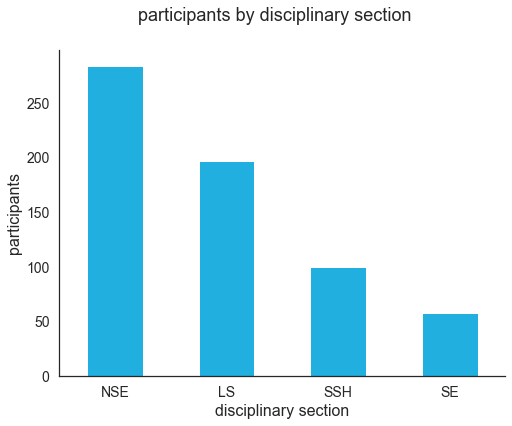

In [23]:
# create bar chart with adjusted column width

# adjust column width

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='disciplinary section', y='participants', data=df_participants_by_section, color='deepskyblue')

#ax.set_xticklabels(df_participants_by_section['disciplinary section'], rotation=40, ha='right')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('disciplinary section', fontsize=16)
plt.ylabel('participants', fontsize=16)
plt.suptitle('participants by disciplinary section', fontsize=18)
sns.despine()

change_width(ax, .50)

plt.show()


### <span style='background:yellow'> Seems strange that Sust & Env is so low, classification issue? </span>

### <span style='background:yellow'> TO DO: Figure out how to display/save high-res images </span>


#### Participants by affiliation

In [24]:
# Create df with participants by affiliation

df_participants_by_affiliation = pd.DataFrame(df['affiliation'].value_counts())
df_participants_by_affiliation.reset_index (inplace = True)
df_participants_by_affiliation.rename(columns = {'index': 'affiliation', 'affiliation': 'participants'}, inplace = True)
df_participants_by_affiliation.head()

,affiliation,participants
0,ESCIENCE CENTER,99
1,TU DELFT,82
2,UVA,64
3,UTRECHT UNIVERSITY,59
4,VU AMSTERDAM,49


In [25]:
# Excluding participants from eScience Center
# Create df with participants by affiliation type

df_participants_by_affiliation = pd.DataFrame(df_external['affiliation'].value_counts())
df_participants_by_affiliation.reset_index (inplace = True)
df_participants_by_affiliation.rename(columns = {'index': 'affiliation', 'affiliation': 'participants'}, inplace = True)
df_participants_by_affiliation.head()

,affiliation,participants
0,TU DELFT,82
1,UVA,64
2,UTRECHT UNIVERSITY,59
3,VU AMSTERDAM,49
4,WAGENINGEN UNIVERSITY,35


In [26]:
df_participants_by_affiliation.to_csv('participants_by_affiliation.csv')